## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
def mlp_compile(model_ckpt, name="unknown", Batch_Size=1024, results={}):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with %s" % (name))

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-{0}".format(name)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

def plotGraph(results):
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.ylim([0, 5])
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

## 試比較 save_best_only 與否的差異

Experiment with save_best_only-True
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________

50000/50000 [==============================] - 7s 138us/step - loss: 0.5666 - acc: 0.8337 - val_loss: 1.5990 - val_acc: 0.4930
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.5512 - acc: 0.8394 - val_loss: 1.5985 - val_acc: 0.4952
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5322 - acc: 0.8467 - val_loss: 1.6470 - val_acc: 0.4905
Epoch 48/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.5149 - acc: 0.8527 - val_loss: 1.6273 - val_acc: 0.4977
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.4994 - acc: 0.8593 - val_loss: 1.6538 - val_acc: 0.4880
Epoch 50/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.4838 - acc: 0.8654 - val_loss: 1.6717 - val_acc: 0.4909
Experiment with save_best_only-False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (

50000/50000 [==============================] - 7s 144us/step - loss: 0.6190 - acc: 0.8114 - val_loss: 1.5977 - val_acc: 0.4908
Epoch 44/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.5992 - acc: 0.8197 - val_loss: 1.6007 - val_acc: 0.4905
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5839 - acc: 0.8246 - val_loss: 1.6236 - val_acc: 0.4846
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.5683 - acc: 0.8309 - val_loss: 1.6339 - val_acc: 0.4865
Epoch 47/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.5474 - acc: 0.8416 - val_loss: 1.6397 - val_acc: 0.4888
Epoch 48/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.5323 - acc: 0.8478 - val_loss: 1.6489 - val_acc: 0.4864
Epoch 49/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.5147 - acc: 0.8530 - val_loss: 1.6608 - val_acc: 0.4899
Epoch 50/50
50000/50000 [==============

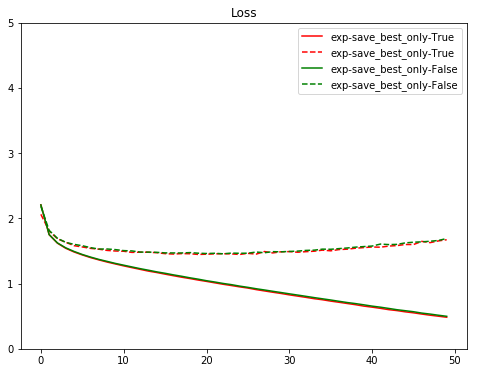

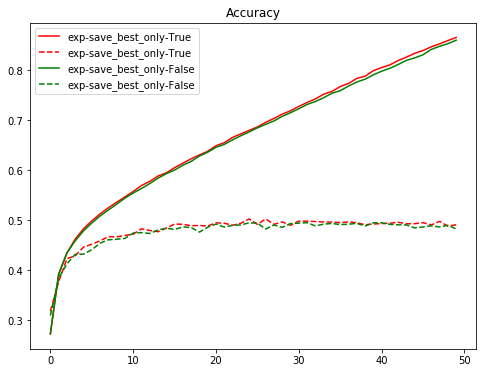

In [9]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

SAVE_BEST_ONLY = [True, False]

results = {}
for save_best_only in SAVE_BEST_ONLY:
    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                                 monitor="val_loss", 
                                 save_best_only=save_best_only)
    name = "save_best_only-{0}".format(save_best_only)
    mlp_compile(name=name, model_ckpt=model_ckpt, results=results)

plotGraph(results)

## 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [10]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

results = {}
model_ckpt = ModelCheckpoint(filepath="./tmp2.h5", 
                             monitor="val_loss", 
                             save_best_only=True,
                             save_weights_only=True)
name = "save_weights_only"
mlp_compile(name=name, model_ckpt=model_ckpt, results=results)

Experiment with save_weights_only
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)  

KeyboardInterrupt: 

In [22]:
# Load back
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

model.load_weights("./tmp2.h5", by_name = True)

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
__________

No handles with labels found to put in legend.


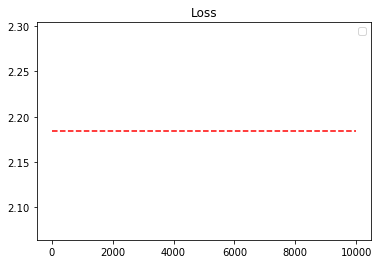

No handles with labels found to put in legend.


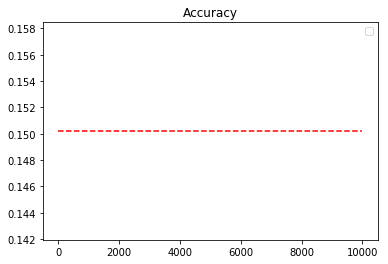

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hlines(y=loss_loadback, xmin=0, xmax=len(y_test), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.hlines(y=acc_loadback, xmin=0, xmax=len(y_test), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()